In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

Upload the data of file Body_Temperature.csv recording the body temparature of 1000 persons into a pandas dataframe. 

In [3]:
temp_df = pd.read_csv('Body_Temperature.csv')

In [5]:
#Compute mean and standard deviation of the body temperature
mean = temp_df['Body_Temperature'].mean()
std = temp_df['Body_Temperature'].std()

In [23]:
print("The mean of body temperatures is -",mean)
print("The standard deviation of body temperatures is -",std)

The mean of body temperatures is - 36.70450999999999
The standard deviation of body temperatures is - 0.20124576954500126


In [9]:
#Check whether the data representing body temperature is normally distributed or not
k2, p = ss.normaltest(temp_df['Body_Temperature'])
if p > 0.05:
    print("Yes the data is normally distributed")
else:
    print("No the data is not normally distributed")

Yes the data is normally distributed


In [11]:
# Declare a Gaussian Distribution named body_gaussian with the above mean and std. 
body_gaussian = ss.norm(mean, std)

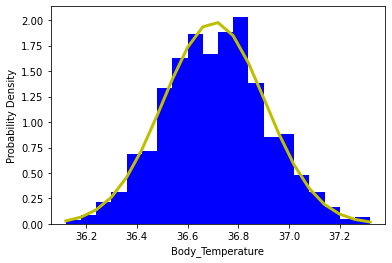

In [14]:
# Plot the distribution curve of body_gaussian
count, bins, ignored = plt.hist(temp_df['Body_Temperature'], bins = 20, density=True, stacked=True, color = 'b')
plt.xlabel('Body_Temperature')
plt.ylabel('Probability Density')
mu = temp_df['Body_Temperature'].mean()
sigma = temp_df['Body_Temperature'].std()
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
plt.show()

Let's perform some statistical analysis on the data, based on out body_gaussian model. 

In [16]:
lower,upper = body_gaussian.ppf(0.05), body_gaussian.ppf(0.95)
print("The middle 90% of body temperatures fall between temperatures", lower,"and",upper)

The middle 90% of body temperatures fall between temperatures 36.373490166055255 and 37.03552983394473


In [18]:
frac = 1 - body_gaussian.cdf(37)
print("The fraction of people that would be expected to have a body temperature above 37.0 is", frac)
print("That is around",frac*100,"%")

The fraction of people that would be expected to have a body temperature above 37.0 is 0.0710108111354989
That is around 7.10108111354989 %


In [21]:
coolest = body_gaussian.ppf(0.2)
print("The coolest 20% of all people have a temperature below",coolest)

The coolest 20% of all people have a temperature below 36.5351372871842
